In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from joblib import dump, load
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df = df.drop(columns = ['id'])

In [136]:
rows, columns = df.shape
print(f"Dane zawierają {columns} kolumn oraz {rows} wierszy.")

Dane zawierają 31 kolumn oraz 568630 wierszy.


In [4]:
missing_values = df.isnull().sum()
if missing_values[missing_values > 0].sum() > 0:
    print(f"Dane zawierają następującą ilość brakujących wartości:\n{missing_values[missing_values > 0]}")
else:
    print("Dane nie zawierają brakujących wartości.")

Dane nie zawierają brakujących wartości.


In [72]:
classes=df['Class'].value_counts()
print('Binarne etykiety klas: 1 oznacza oszustwo transakcyjne, a 0 prawidłową transakcję.\n\nLiczebność poszczególnych klas:\n', classes)

Binarne etykiety klas: 1 oznacza oszustwo transakcyjne, a 0 prawidłową transakcję.

Liczebność poszczególnych klas:
 0    284315
1    284315
Name: Class, dtype: int64


In [6]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop(columns = ['Class']))
df_scaled = pd.DataFrame(scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,-1.105231
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,-1.067766
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,1.666401
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,-0.271853


## Podstawowa analiza danych

In [62]:
df_scaled.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,...,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.50,-49.97,-3.18,-4.95,-9.95,-21.11,-4.35,-10.76,-3.75,-3.16,...,-78.15,-19.38,-7.73,-30.30,-4.07,-13.61,-8.23,-10.50,-39.04,-1.73
25%,-0.57,-0.49,-0.65,-0.66,-0.29,-0.45,-0.28,-0.19,-0.57,-0.59,...,-0.35,-0.17,-0.49,-0.24,-0.65,-0.55,-0.63,-0.30,-0.23,-0.87
50%,-0.09,-0.14,0.00,-0.07,0.08,0.08,0.23,-0.11,0.09,0.26,...,-0.12,-0.04,-0.03,-0.06,0.02,-0.01,-0.01,-0.17,-0.01,-0.00
75%,0.83,0.34,0.63,0.71,0.44,0.50,0.53,0.05,0.56,0.59,...,0.25,0.15,0.46,0.16,0.70,0.55,0.67,0.33,0.41,0.87
max,2.23,4.36,14.13,3.20,42.72,26.17,217.87,5.96,20.27,31.72,...,29.87,8.09,12.63,31.71,12.97,14.62,5.62,113.23,77.26,1.73


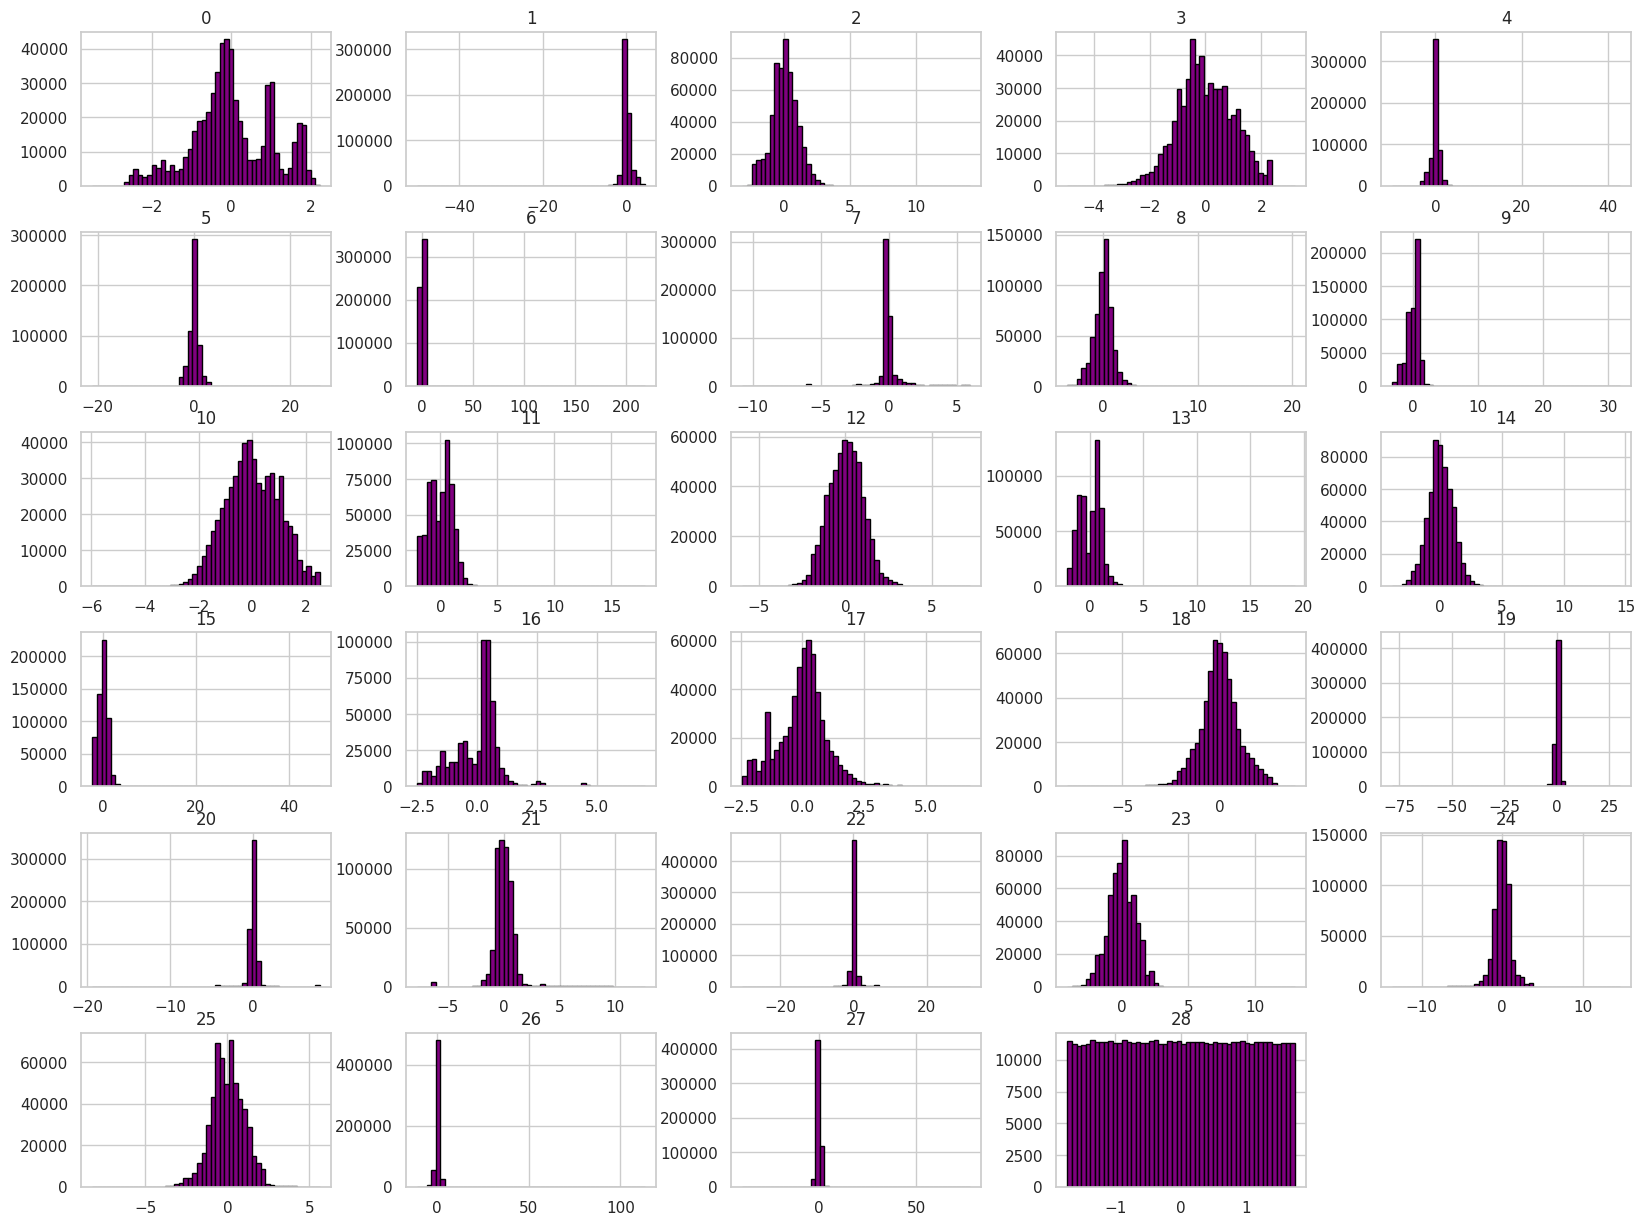

In [63]:
df_scaled.hist(bins=50, figsize=(20, 15), color='purple', edgecolor='black')
plt.show()

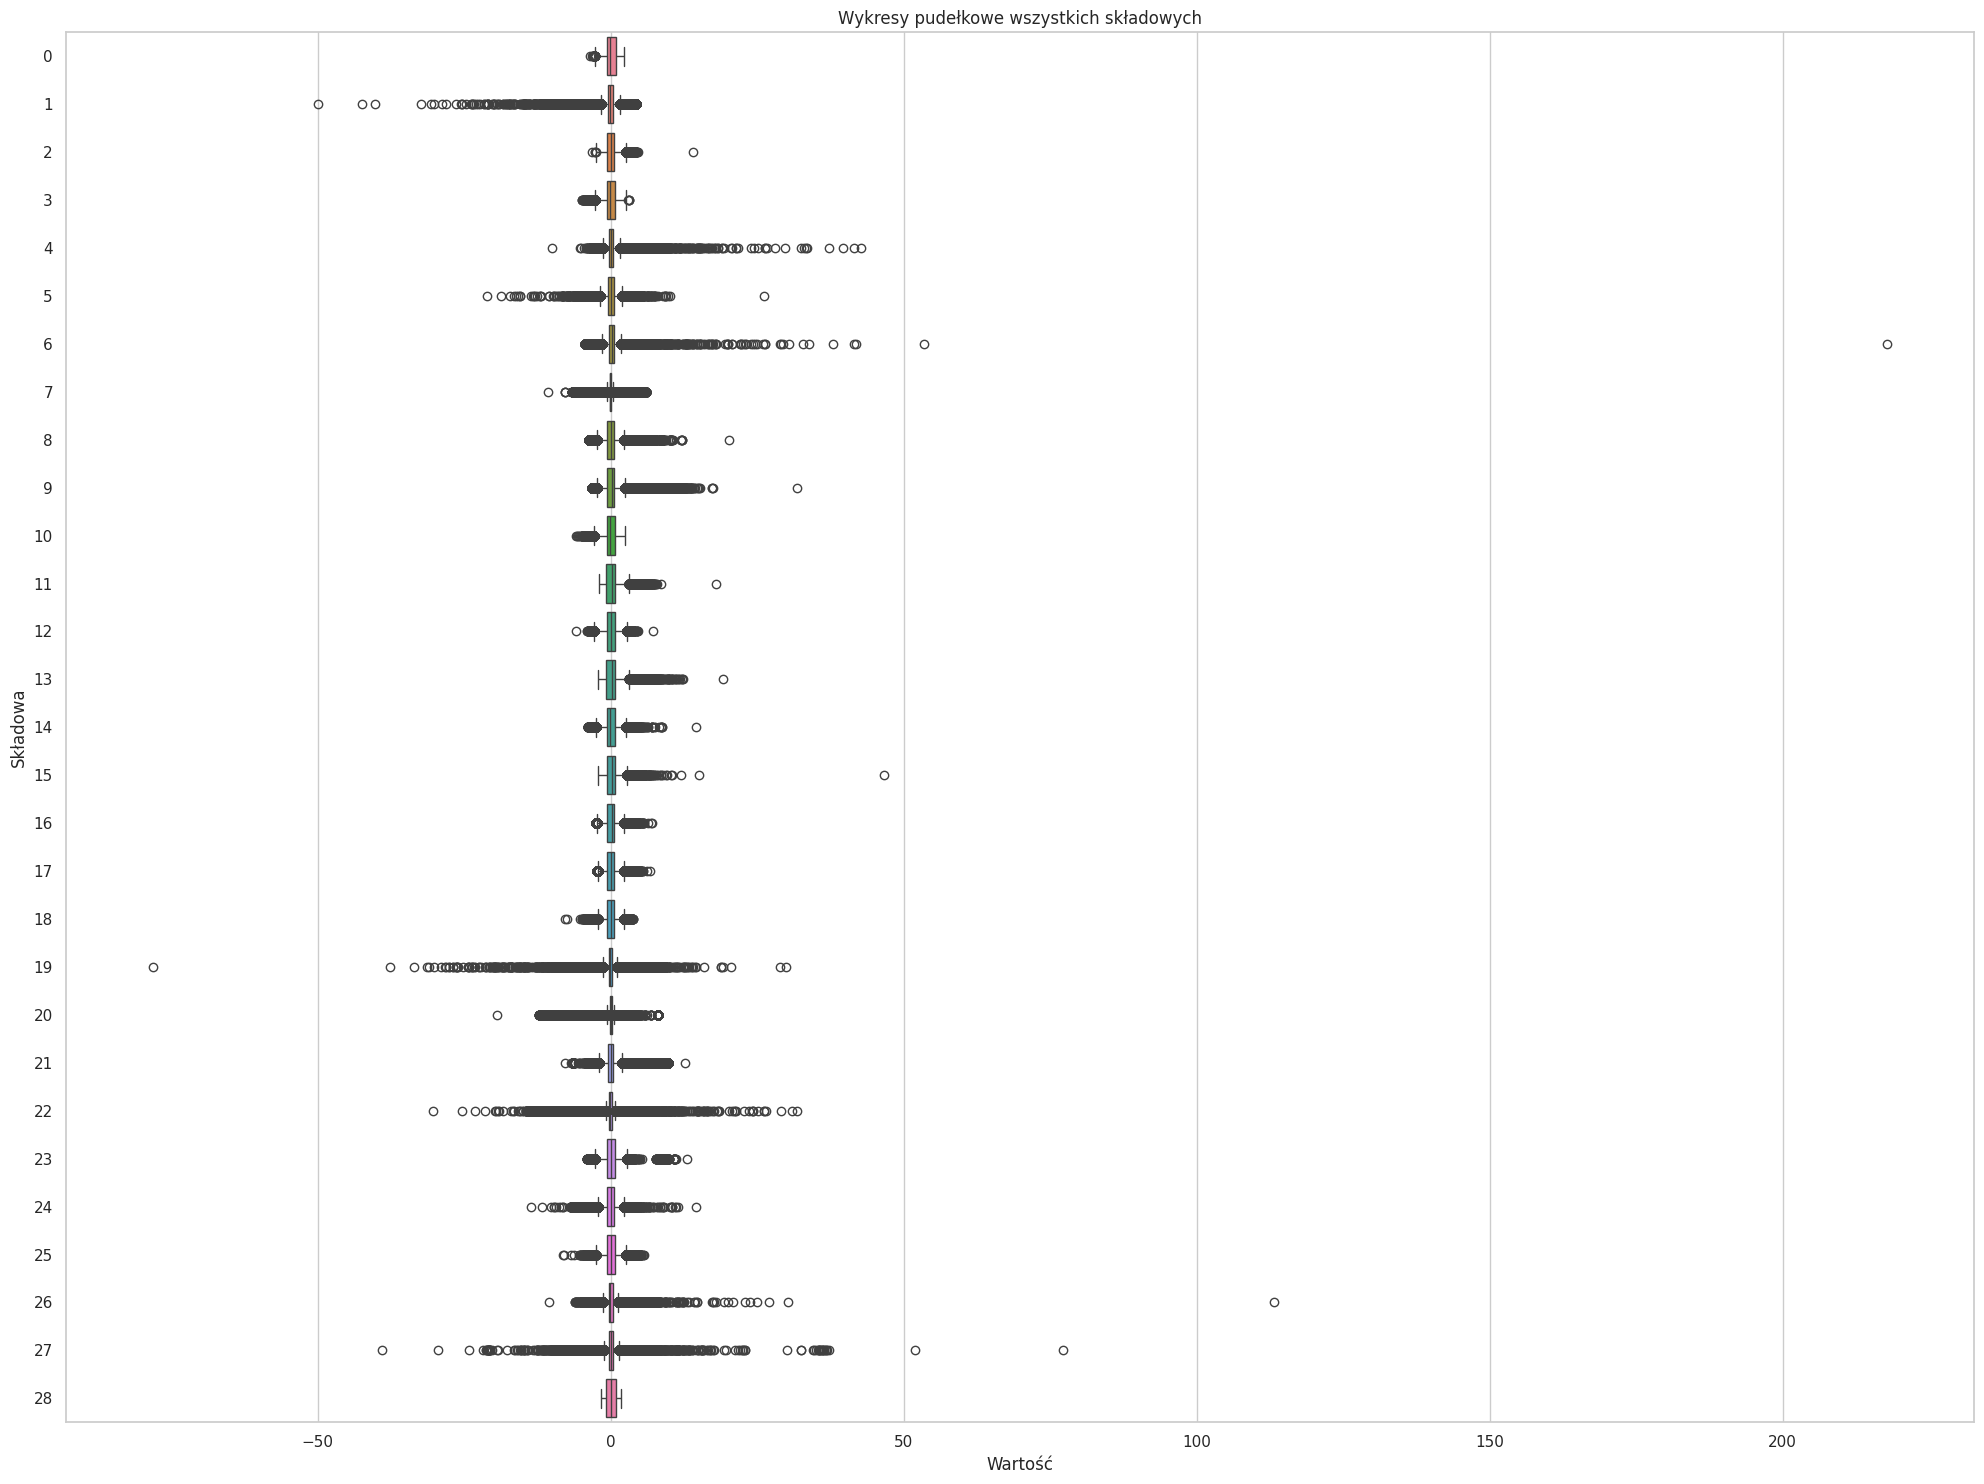

In [64]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_scaled, orient="h")

plt.title('Wykresy pudełkowe wszystkich składowych')
plt.xlabel('Wartość')
plt.ylabel('Składowa')

plt.tight_layout()
plt.show()

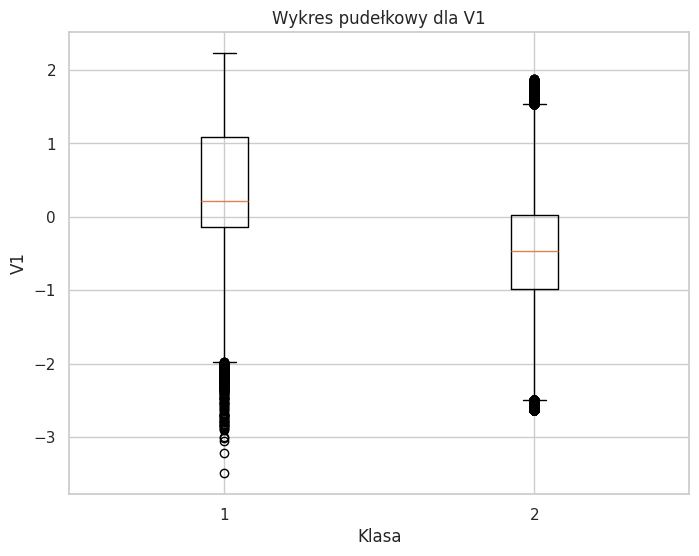

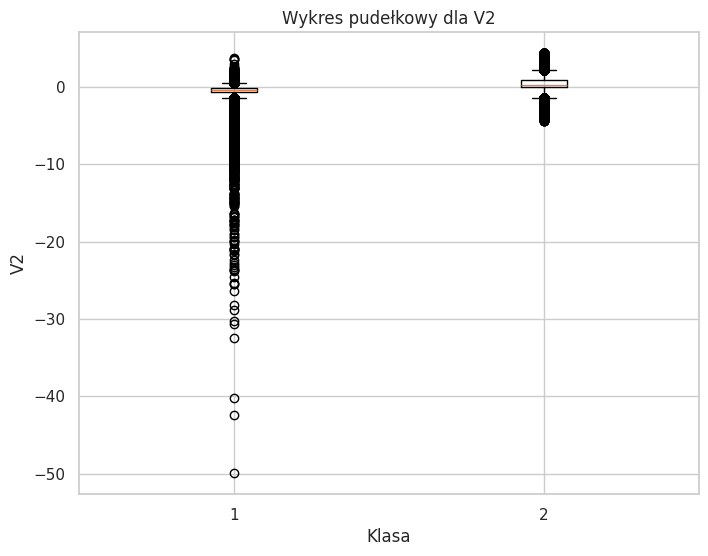

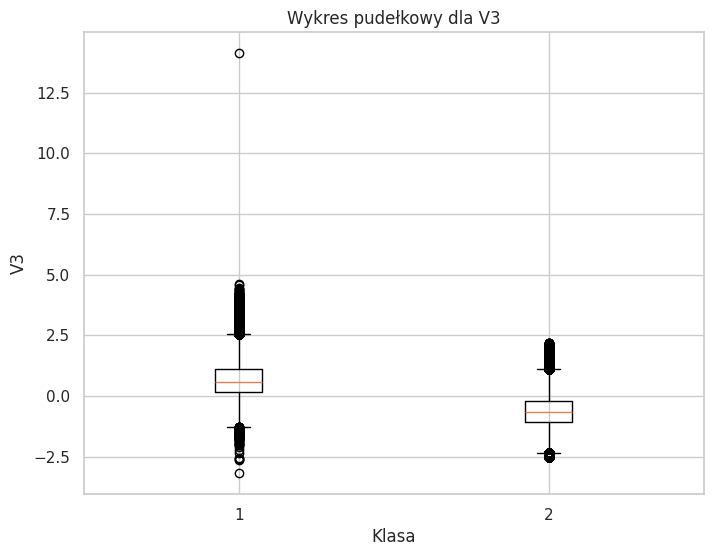

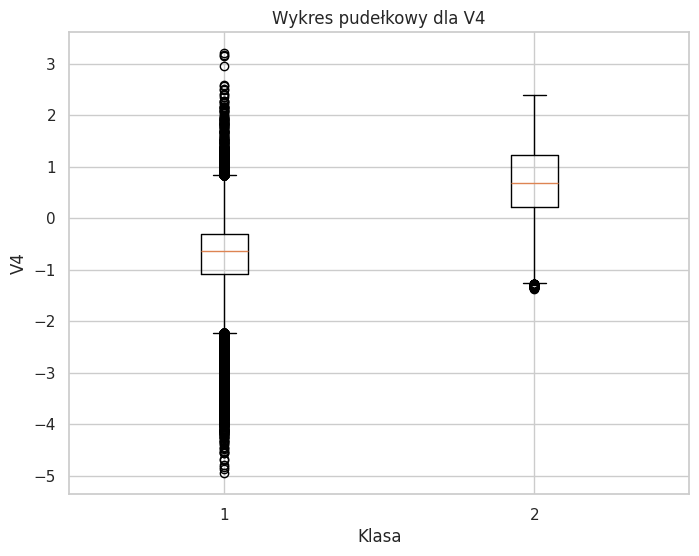

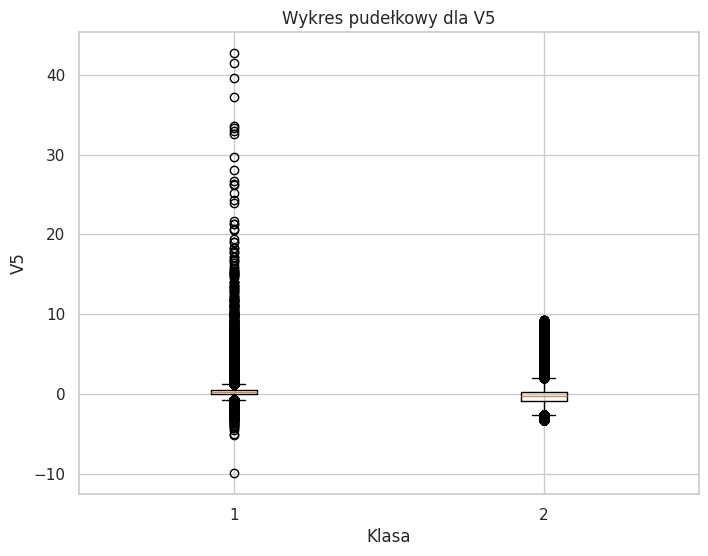

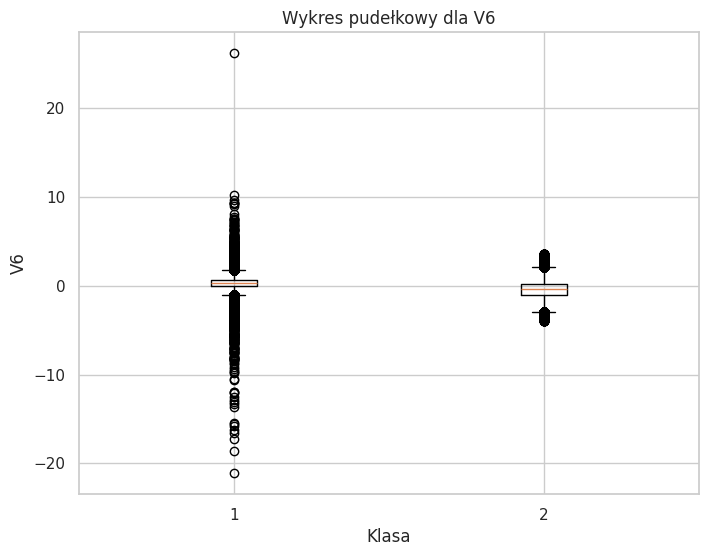

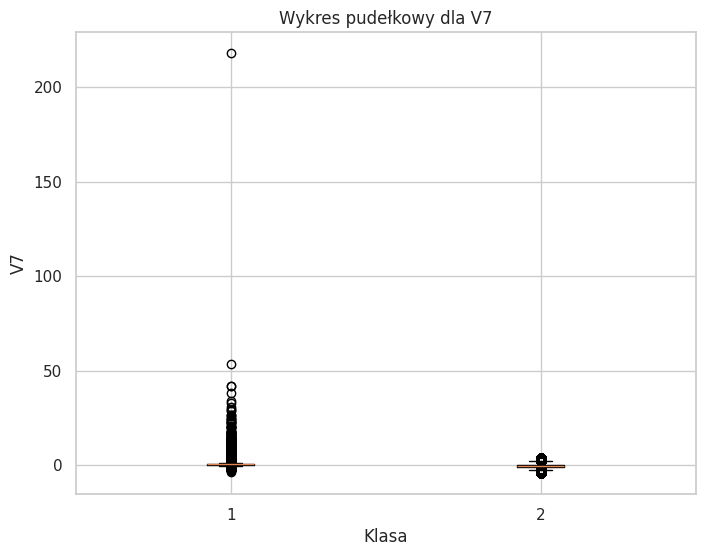

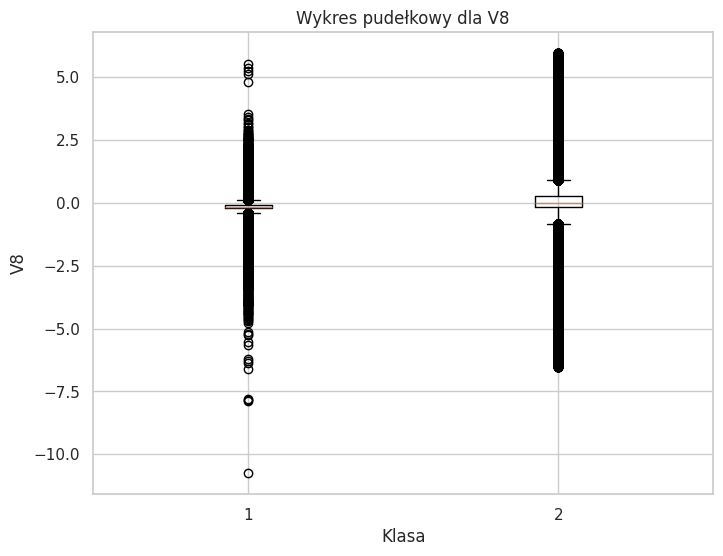

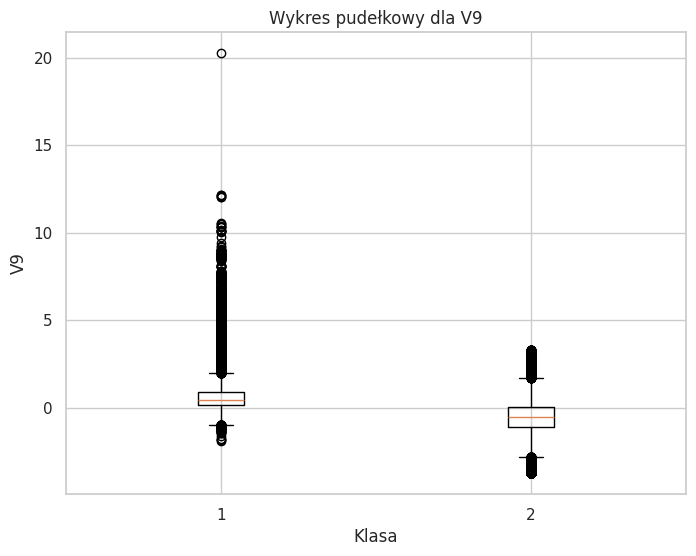

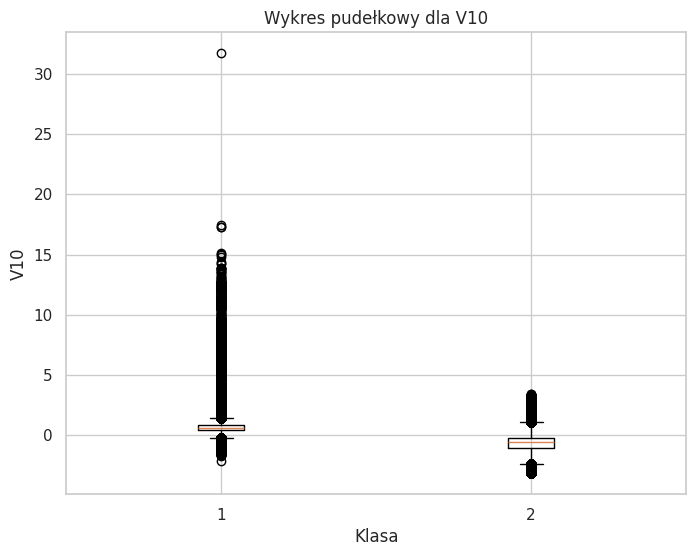

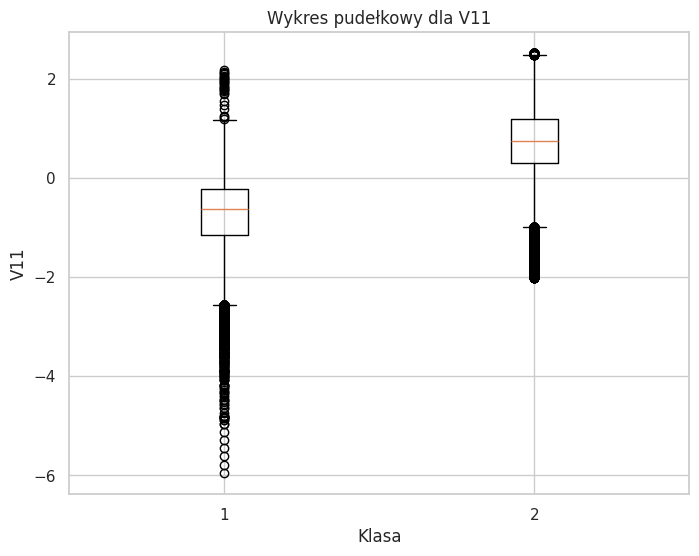

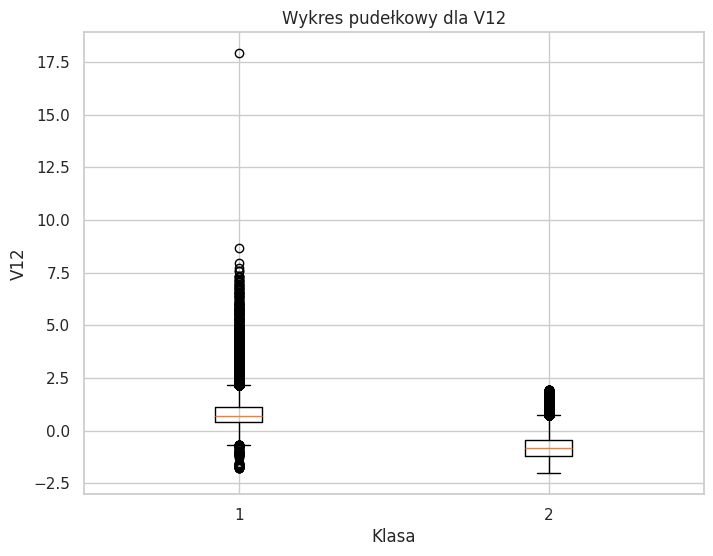

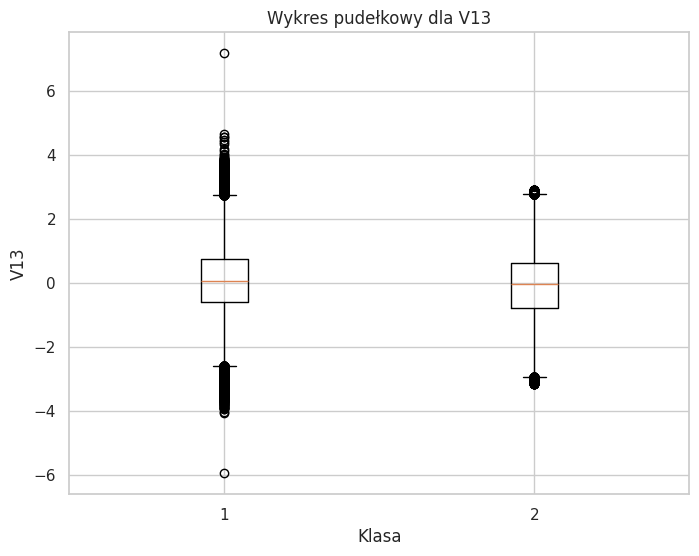

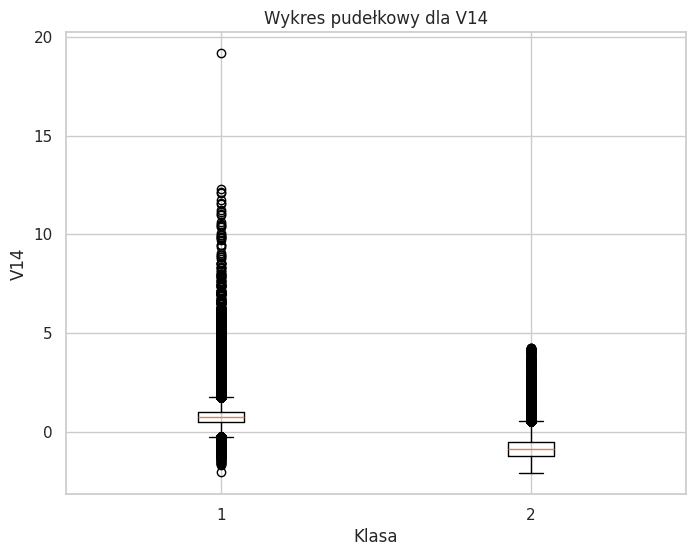

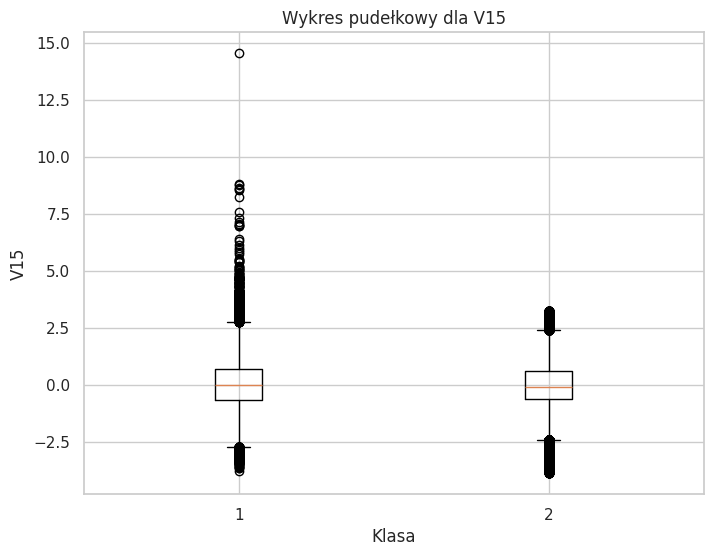

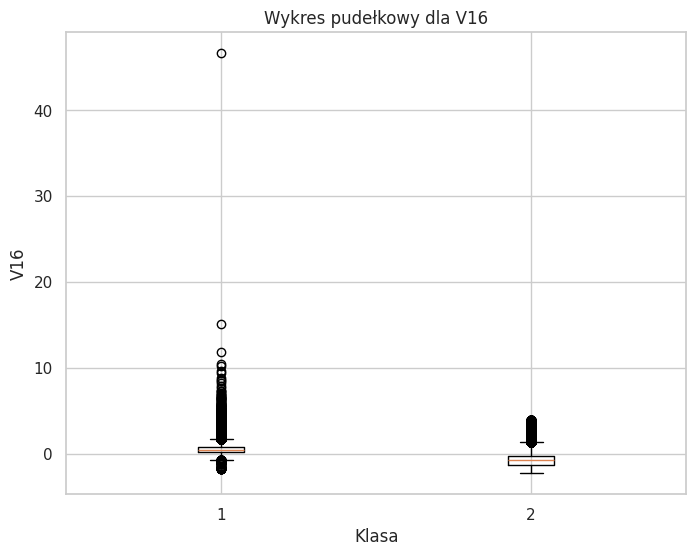

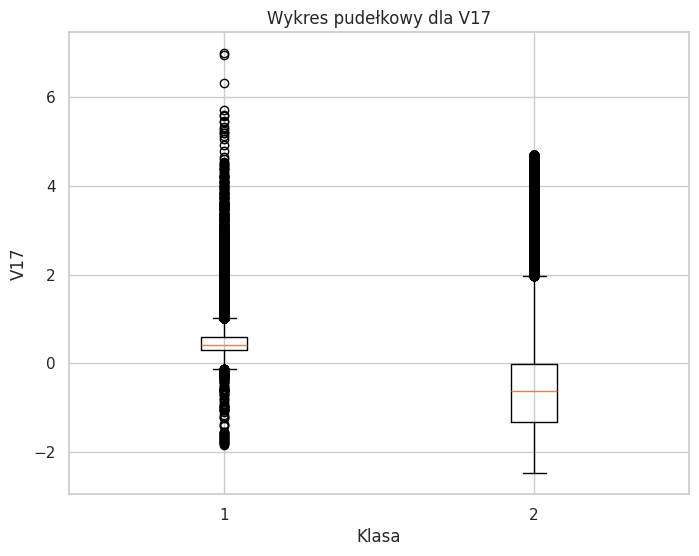

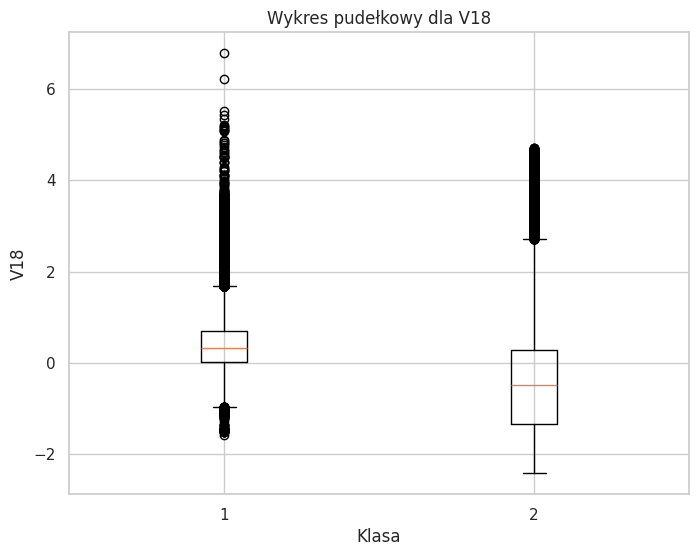

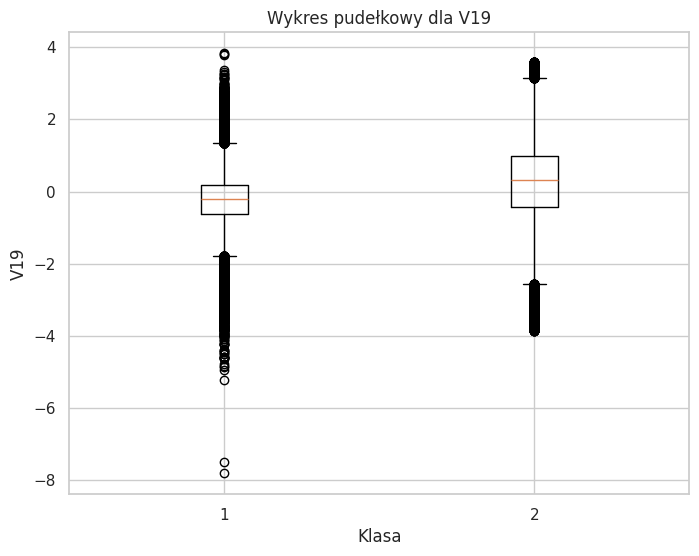

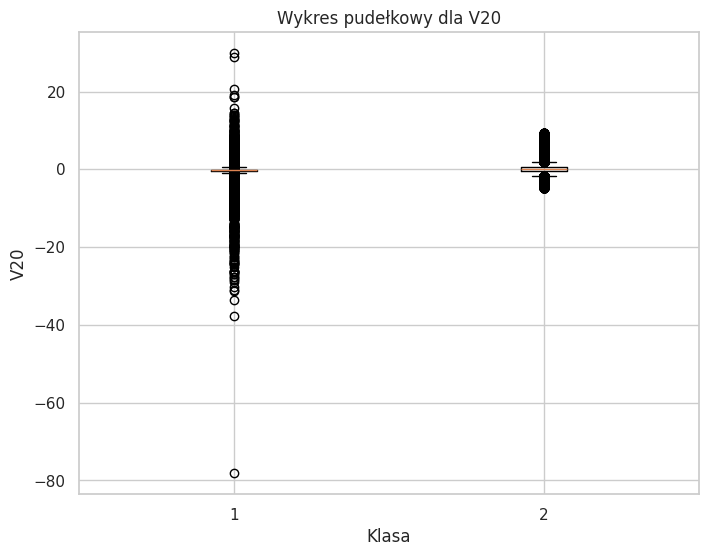

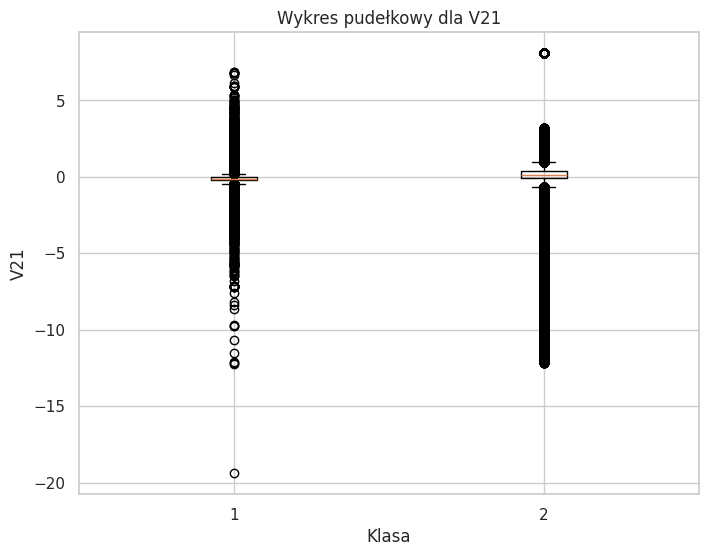

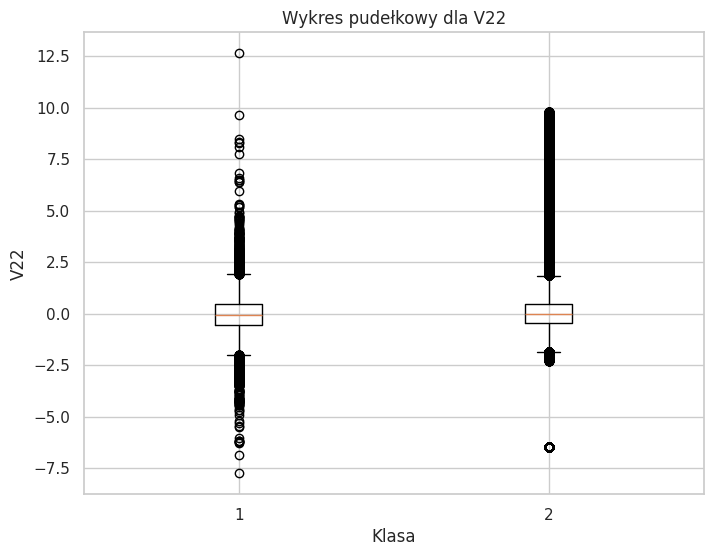

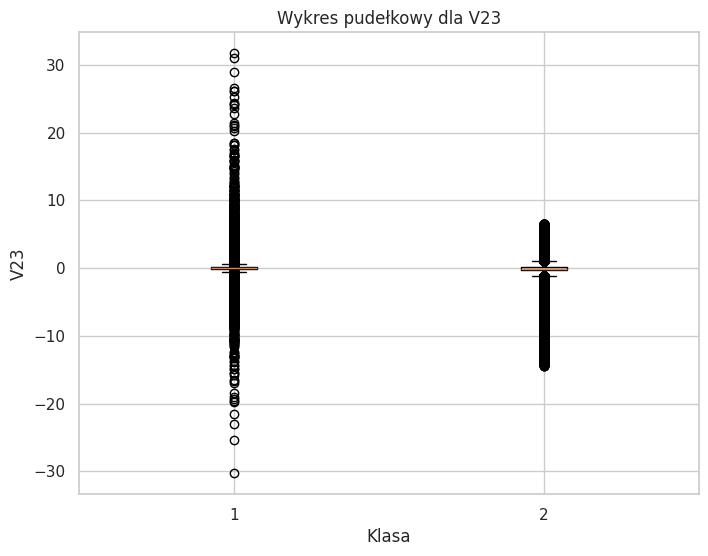

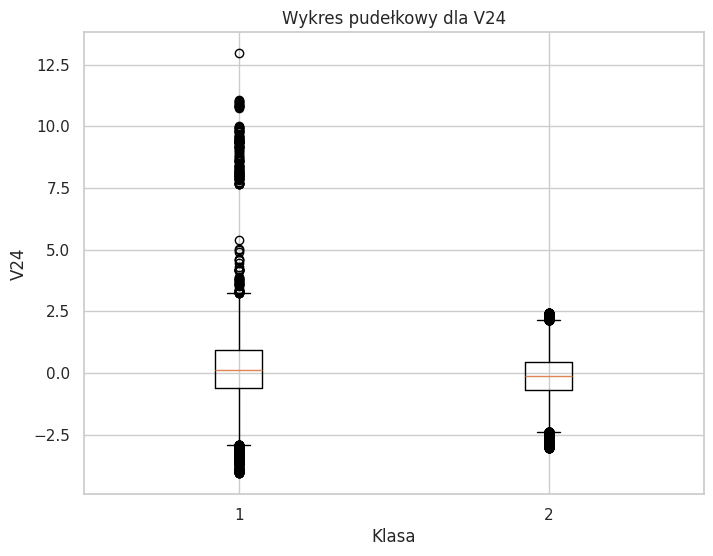

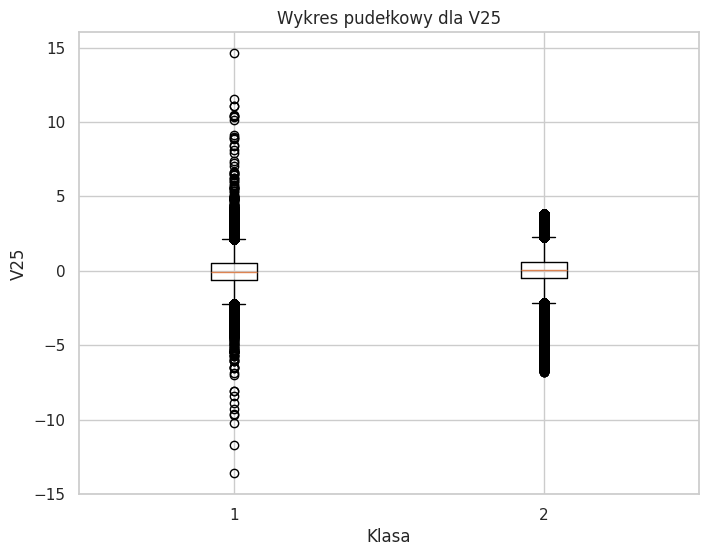

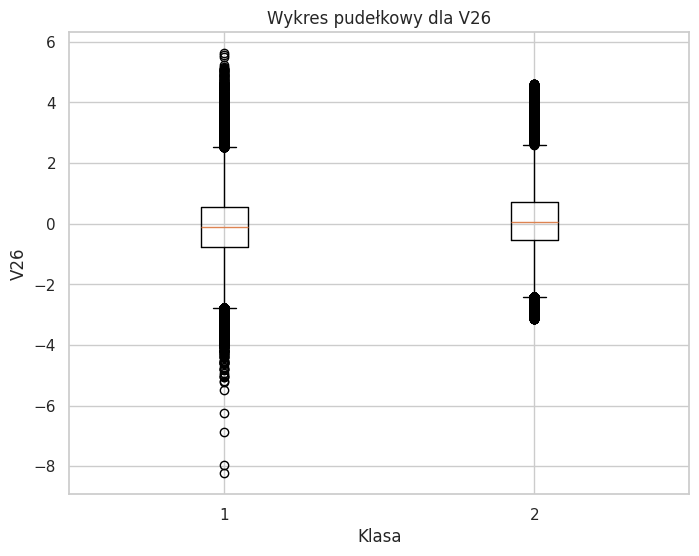

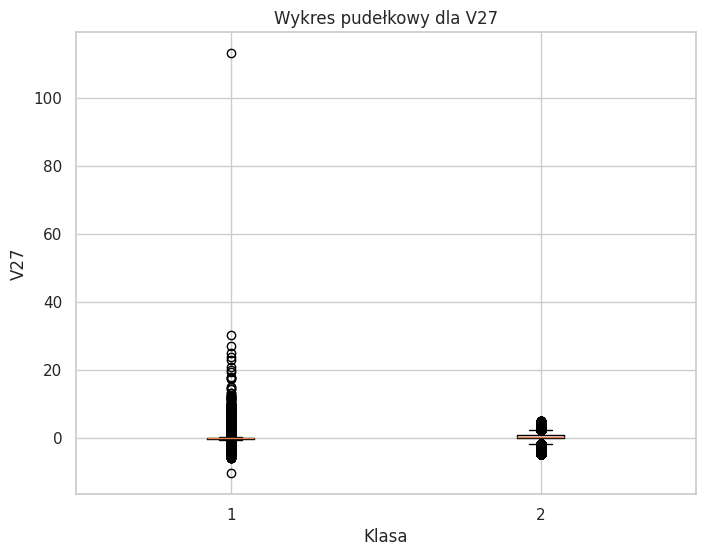

In [69]:
df_to_stats = df.drop(columns = ['Amount', 'Class'])

for col in df_to_stats.columns[:-1]:
    plt.figure(figsize=(8, 6))
    plt.boxplot([df.loc[df['Class'] == 0, col], df.loc[df['Class'] == 1, col]])
    plt.title(f"Wykres pudełkowy dla {col}")
    plt.xlabel("Klasa")
    plt.ylabel(col)
    plt.show()

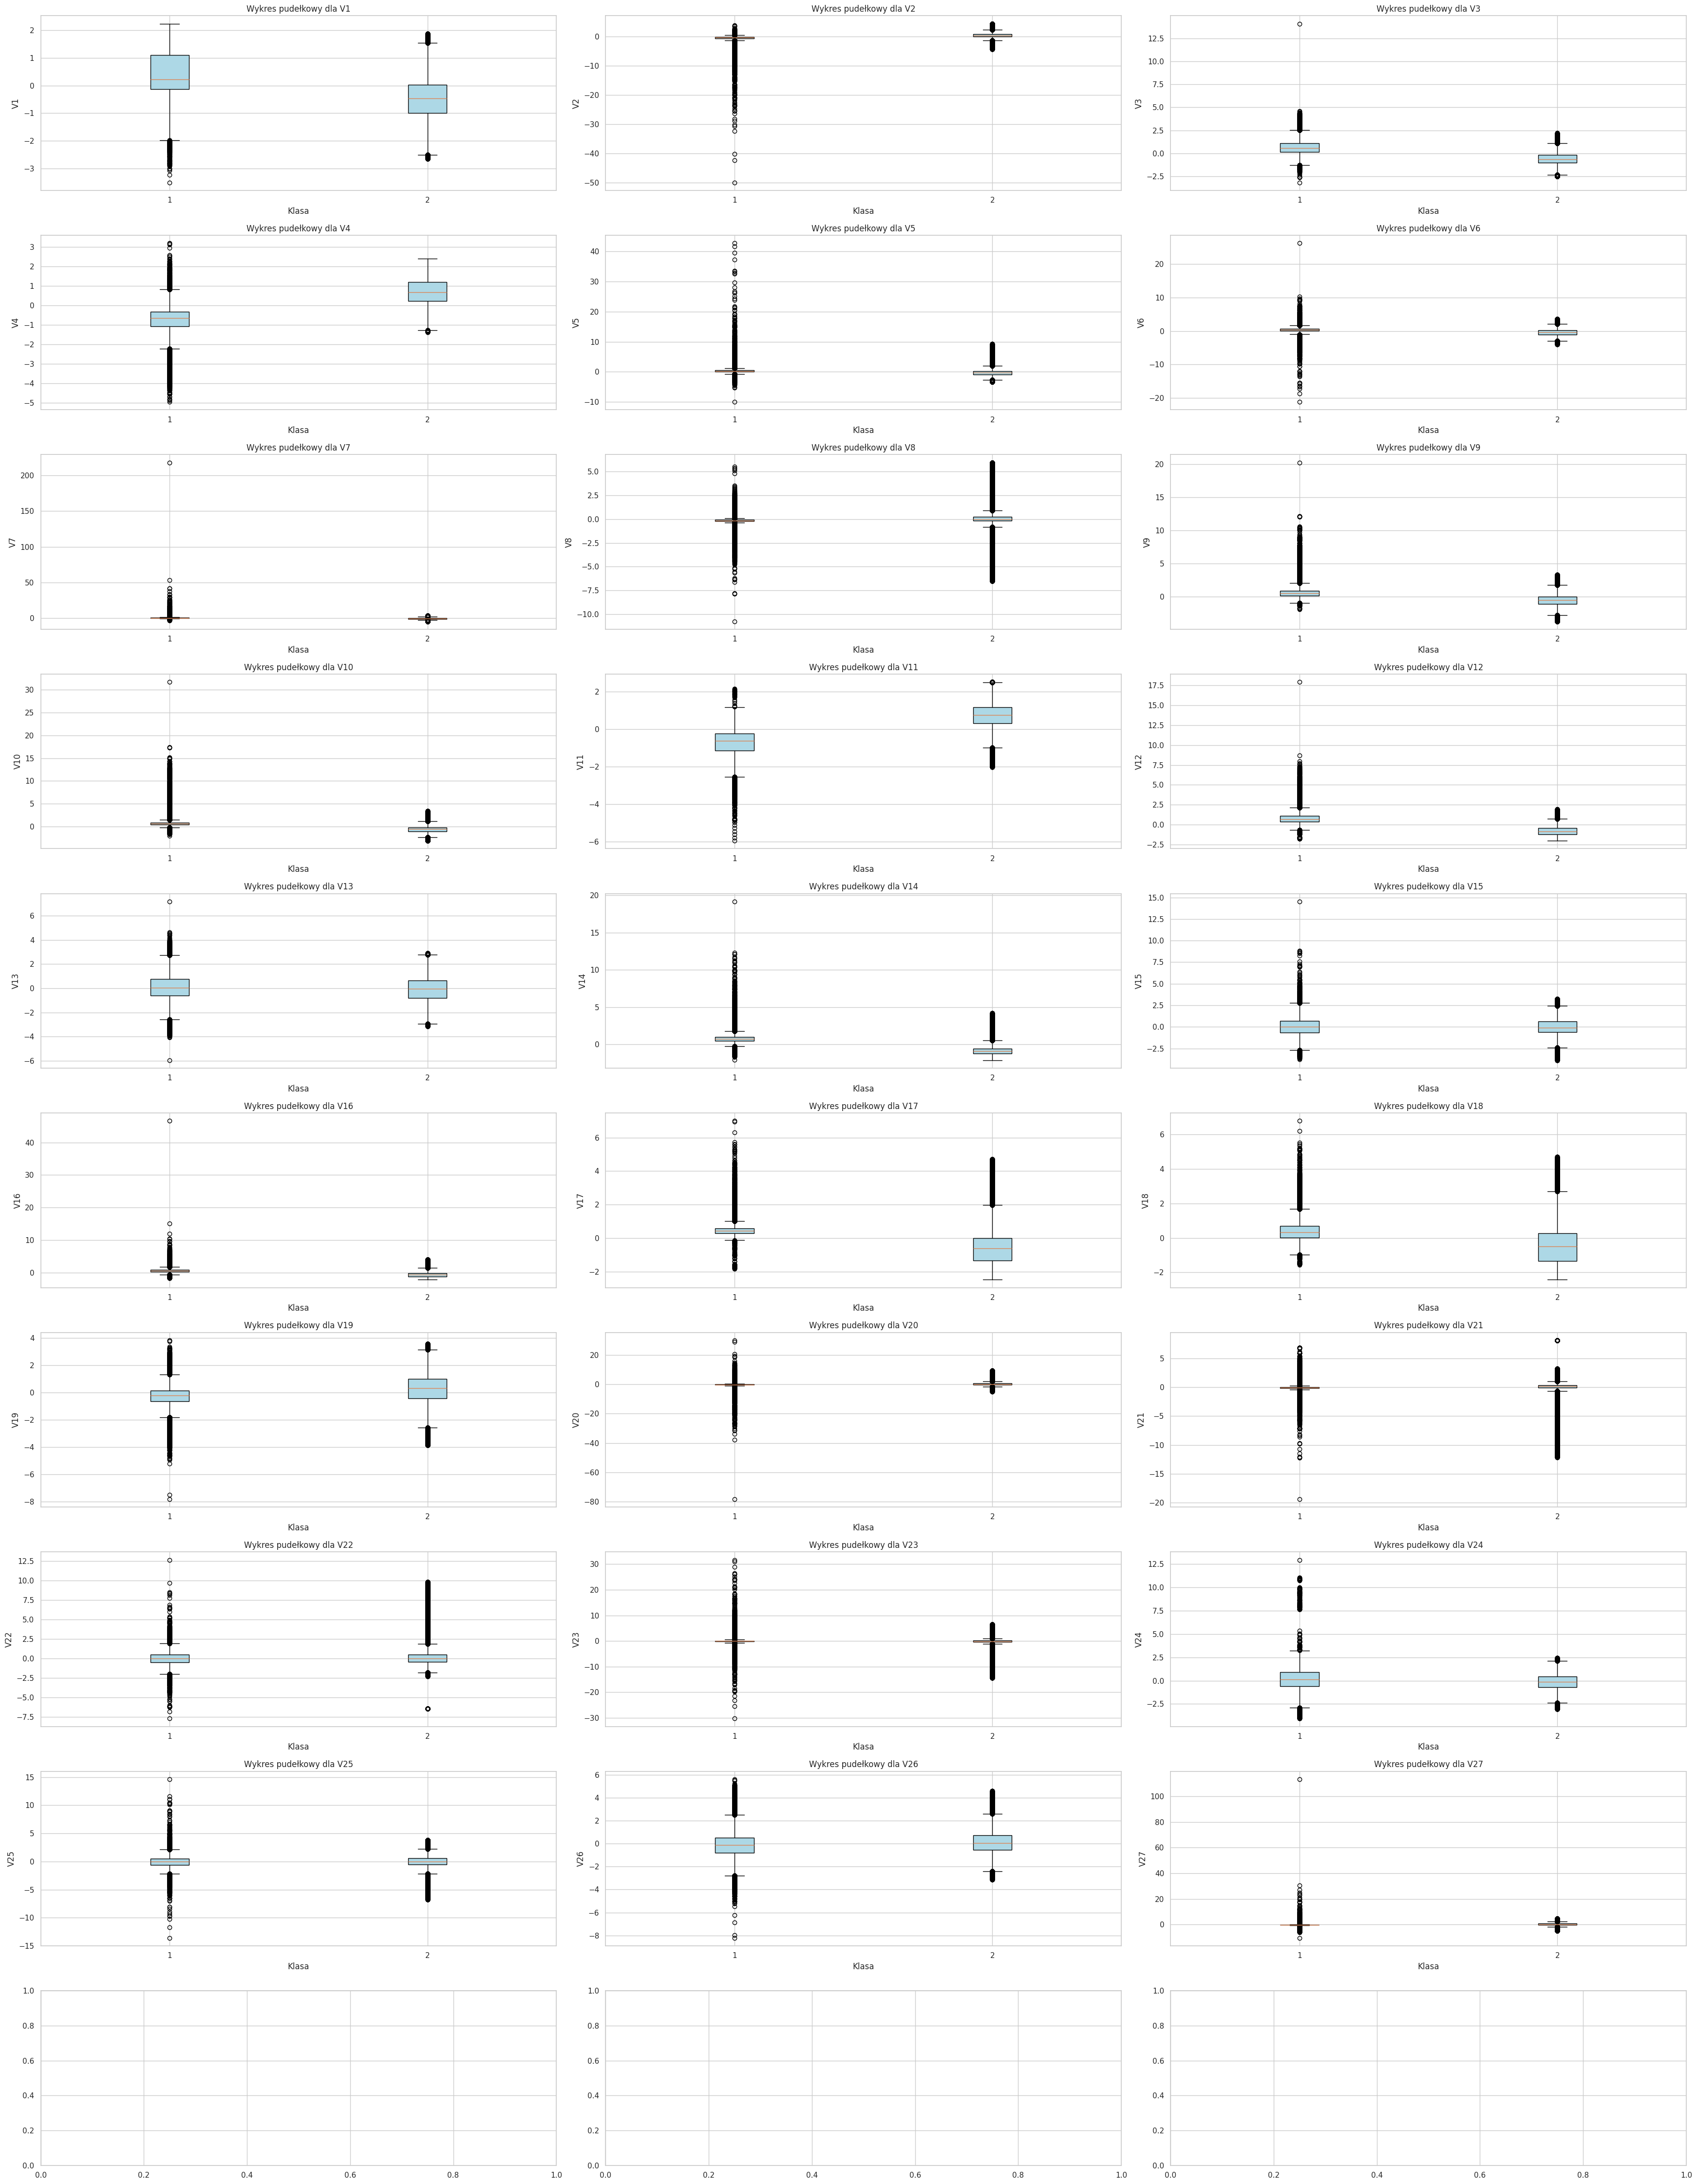

In [70]:
figsize = (35, 45)
n_cols = 3

n_rows = (len(df_to_stats.columns) - 1) // n_cols + 1
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
for i, col in enumerate(df_to_stats.columns[:-1]):
    row = i // n_cols
    col_idx = i % n_cols
    bp = axs[row, col_idx].boxplot([df.loc[df['Class'] == 0, col], df.loc[df['Class'] == 1, col]], patch_artist=True)
    for box in bp['boxes']:
        box.set(facecolor='lightblue')
    axs[row, col_idx].set_title(f"Wykres pudełkowy dla {col}")
    axs[row, col_idx].set_xlabel("Klasa")
    axs[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()

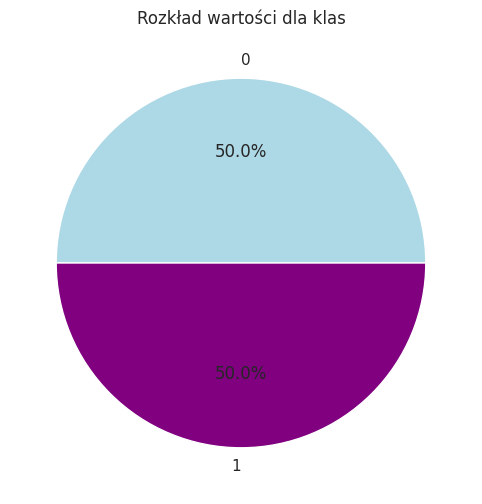

In [74]:
plt.figure(figsize=(8, 6))
plt.pie(classes, labels=classes.index, autopct='%1.1f%%', colors=['lightblue', 'purple'])
plt.title('Rozkład wartości dla klas')
plt.show()

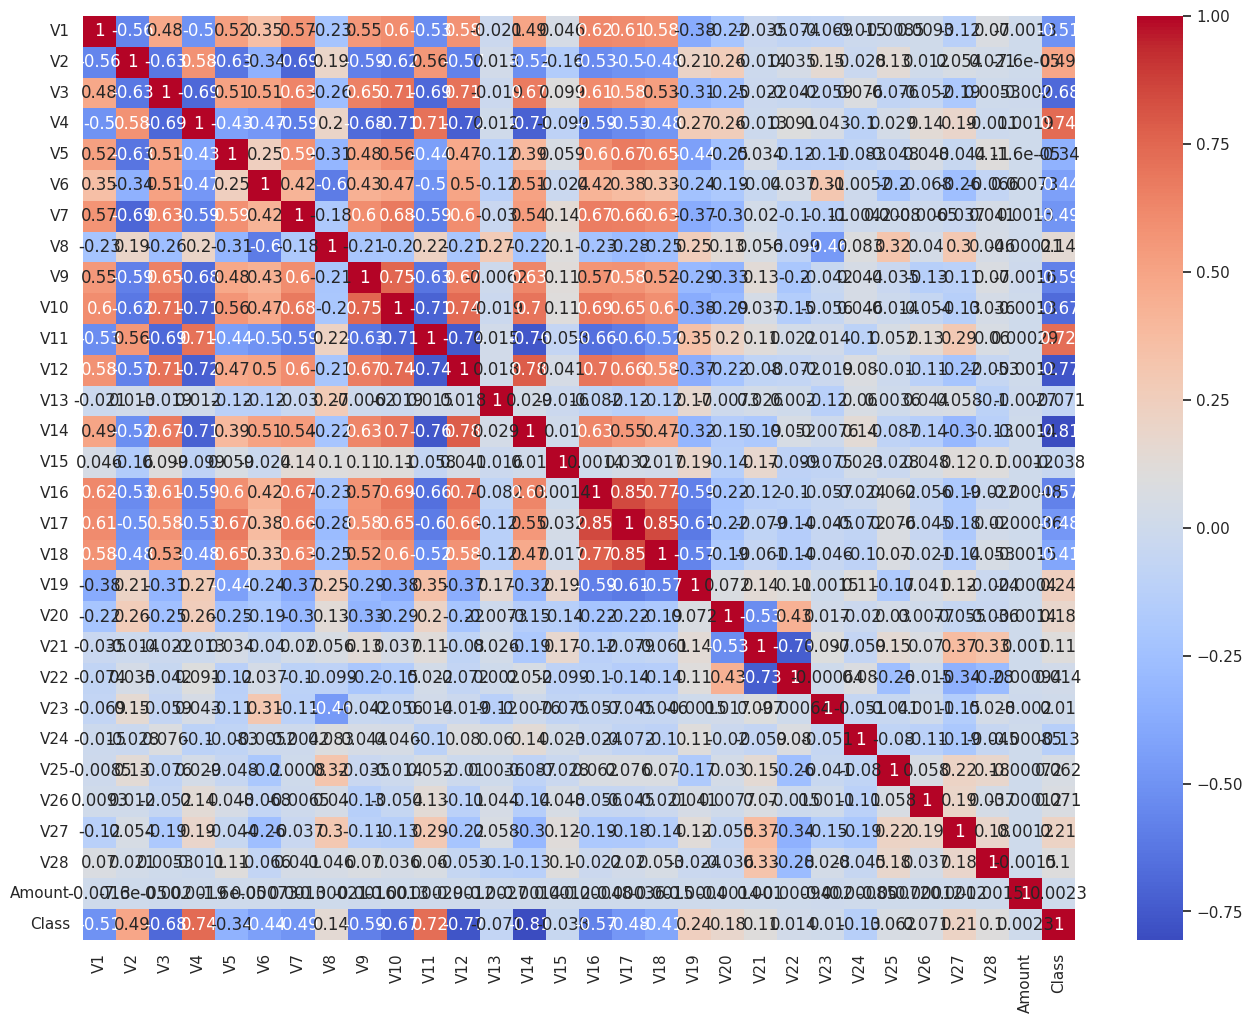

In [23]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

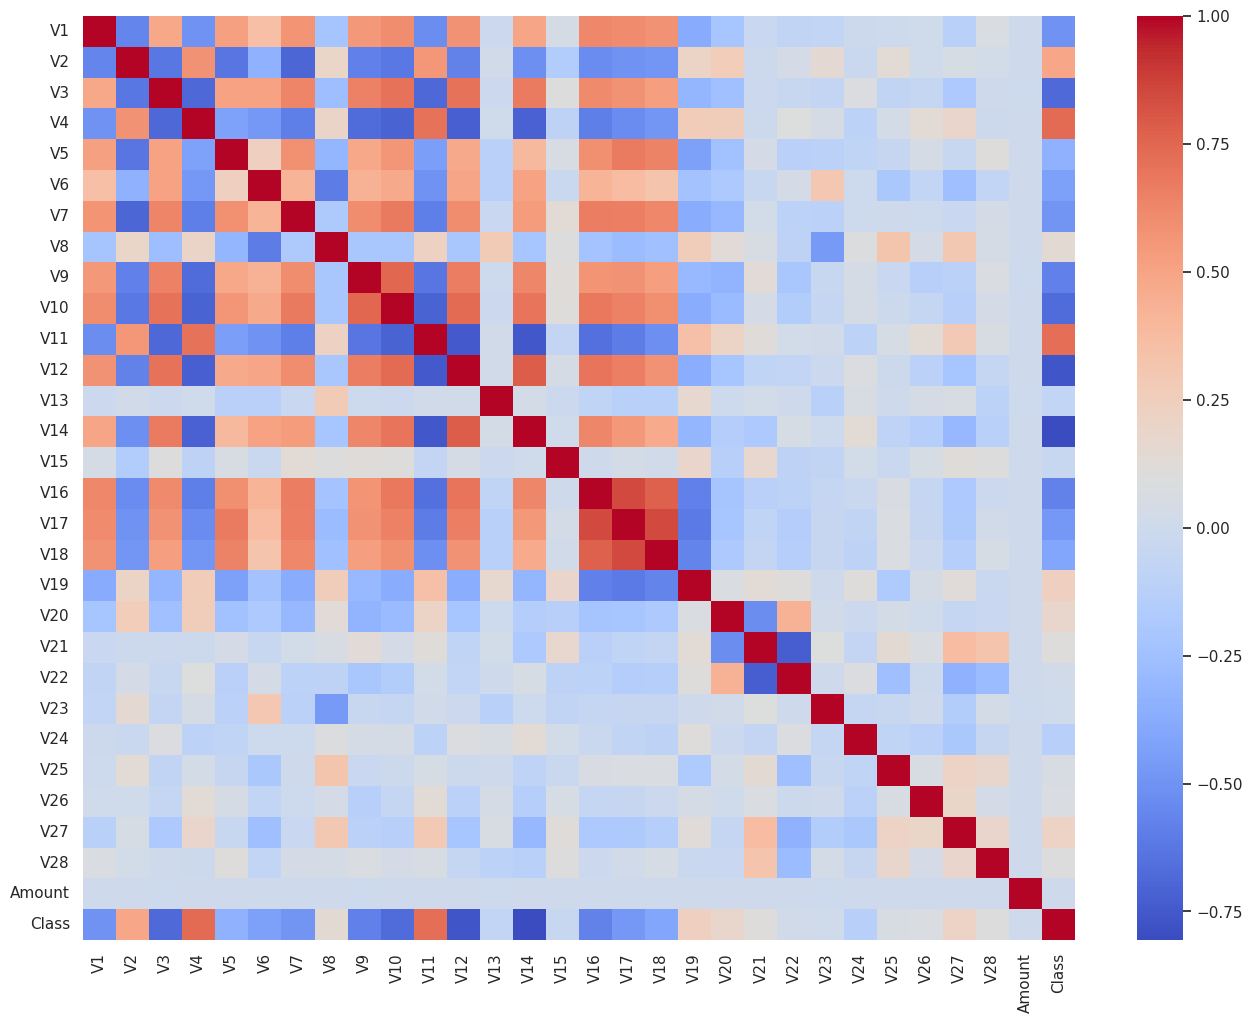

In [24]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

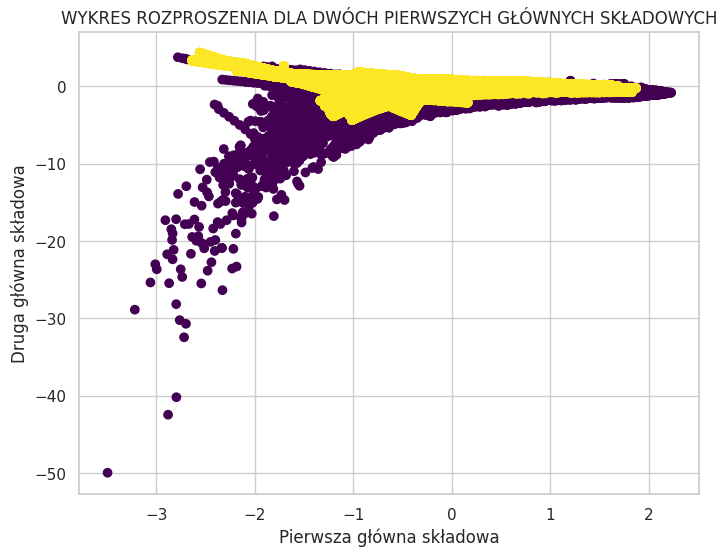

In [78]:
x_axis = df_scaled.iloc[:, 0]
y_axis = df_scaled.iloc[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x_axis, y_axis, c=df['Class'], cmap='viridis')
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')
plt.title('WYKRES ROZPROSZENIA DLA DWÓCH PIERWSZYCH GŁÓWNYCH SKŁADOWYCH')
plt.show()

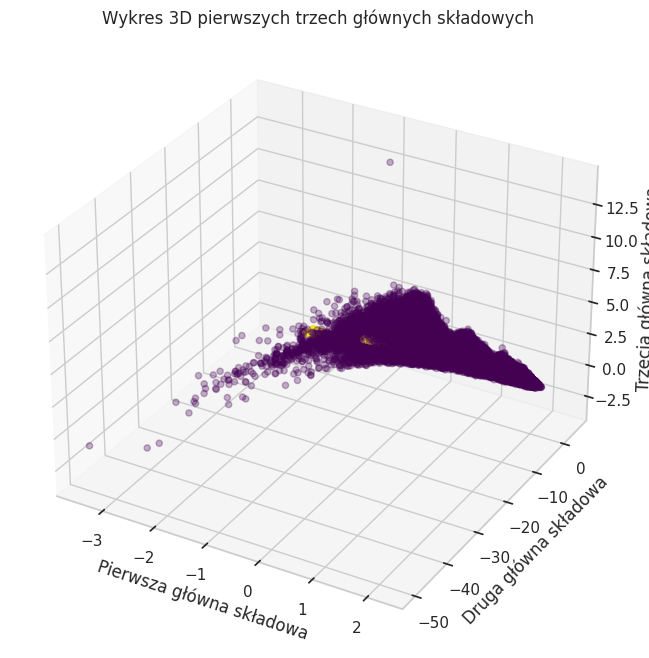

In [90]:
z_axis = df_scaled.iloc[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_axis, y_axis, z_axis, c=df['Class'], cmap='viridis', alpha=0.3)
ax.set_xlabel('Pierwsza główna składowa')
ax.set_ylabel('Druga główna składowa')
ax.set_zlabel('Trzecia główna składowa')
plt.title('Wykres 3D pierwszych trzech głównych składowych')
plt.show()

## Budowa i trening modelu

In [ ]:
X = df_scaled
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)
dump(svm_model, 'svm_model.joblib')

In [18]:
svm_model = load('svm_model.joblib')
y_pred = svm_model.predict(X_test)

## Ewaluacja modelu

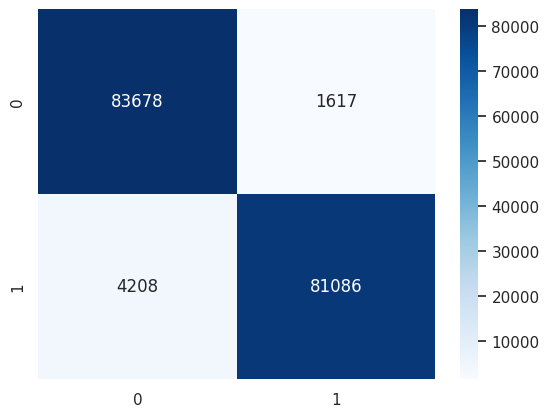

In [111]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [124]:
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred), 5)}")

Accuracy: 0.96585


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85295
           1       0.98      0.95      0.97     85294

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



In [122]:
print(f"MCC: {np.round(matthews_corrcoef(y_test, y_pred), 5)}")

MCC: 0.93214


In [134]:
class_stats = classification_report(y_test, y_pred, output_dict=True)

print(f"Klasa 0:")
print(f" Precision: {np.round(class_stats['0']['precision'], 5)}")
print(f" Recall: {np.round(class_stats['0']['recall'], 5)}")
print(f" F1-score: {np.round(class_stats['0']['f1-score'], 5)}")
print(f" Support: {np.round(class_stats['0']['support'], 5)}\n")

print(f"Klasa 1:")
print(f" Precision: {np.round(class_stats['1']['precision'], 5)}")
print(f" Recall: {np.round(class_stats['1']['recall'], 5)}")
print(f" F1-score: {np.round(class_stats['1']['f1-score'], 5)}")
print(f" Support: {np.round(class_stats['1']['support'], 5)}")

Klasa 0:
 Precision: 0.95212
 Recall: 0.98104
 F1-score: 0.96636
 Support: 85295.0

Klasa 1:
 Precision: 0.98045
 Recall: 0.95066
 F1-score: 0.96533
 Support: 85294.0


In [22]:
pd.DataFrame({'Wartość faktyczna': y_test,'Wartość predykcyjna': y_pred})

,Wartość faktyczna,Wartość predykcyjna
363369,1,1
158118,0,0
202455,0,0
115521,0,0
193355,0,0
...,...,...
185330,0,0
84822,0,0
447075,1,1
123340,0,0
